# Customer Segmentation Using K-Means and DBSCAN Clustering

![K-Means Clustering](Images/customer-segmentation.png)

This project focuses on customer segmentation using the K-Means clustering algorithm. By analyzing a dataset of mall customers, we aim to identify distinct groups based on their demographics and spending behaviors. The project includes the following steps:

* Data Preparation: Load and preprocess the dataset to ensure it is clean and suitable for clustering analysis.
* Exploratory Data Analysis (EDA): Visualize key features to uncover patterns and relationships within the data.
* Feature Engineering: Normalize the dataset and select relevant features for effective clustering.
* Clustering: Implement both K-Means and DBSCAN clustering algorithms to segment the customers. For K-Means, determine the optimal number of clusters using the Elbow Method. For DBSCAN, explore the effect of different parameters like epsilon and min_samples.
* Evaluation: Evaluate the performance and quality of the clusters using metrics such as Silhouette Score and Davies-Bouldin Index.
  
The results from both algorithms provide valuable insights into customer behavior, enabling businesses to optimize their marketing approaches and enhance customer engagement.
___
## Types Clustering:
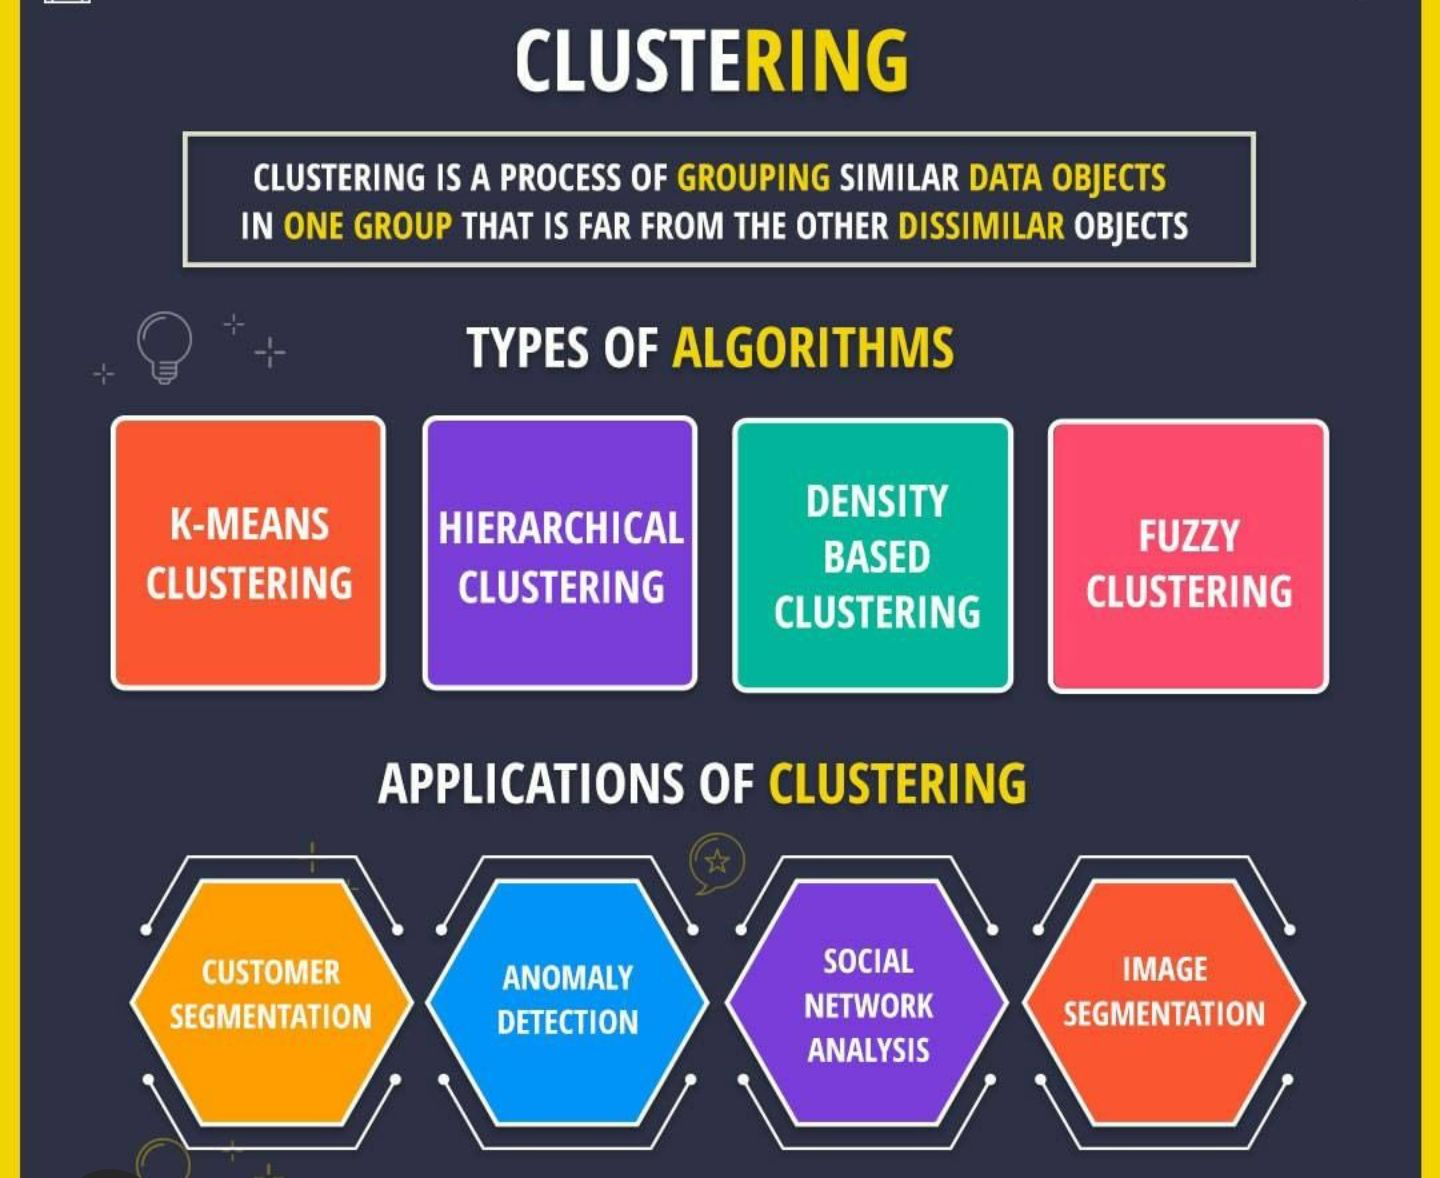
### Connectivity-based clustering
* Distance based
* E.g., Hierarchical clustering


### Centroid-based clustering
* Represents each cluster by a single mean vector
* E.g., k-means algoritm


### Distribution-based clustering
* Modeled using statistical distributions
* E.g., Multivariate normal distributions used by the expectation-maximization algorithm.


### Density-based clustering
* Defines clusters as connected dense regions in the data space.
* E.g., DBSCAN


___
# I: Import Required Libraries

In this step, we import essential libraries for:
- Data manipulation and analysis
- Visualization
- Implementing the k-means and DBSCAN clustering algorithm
Additionally, we configure our Jupyter Notebook for inline plotting.

In [3]:
# 1. Setting Environment Variables (Optional)
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Restrict OpenMP to use a single thread to avoid resource overuse (if needed)

# 2. Libraries for Data Manipulation and Analysis
import pandas as pd  # For handling and processing tabular data (e.g., datasets, dataframes)
import numpy as np   # For numerical computations and array handling

# 3. Libraries for Data Visualization
import seaborn as sns  # For advanced and aesthetic statistical visualizations
import matplotlib.pyplot as plt  # For basic plotting and graph customization

# 4. Libraries for Clustering and Evaluation
from sklearn.cluster import KMeans  # K-Means algorithm for clustering data
from sklearn.preprocessing import StandardScaler  # For scaling data to standardize feature values
from sklearn.decomposition import PCA  # For reducing data dimensions before clustering (if needed)
from sklearn.metrics import silhouette_score, davies_bouldin_score  # For evaluating clustering quality

# 5. Additional Libraries for Enhancements
from matplotlib.patches import Ellipse  # To add ellipses in plots (e.g., visualizing cluster boundaries)
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output
from scipy import stats  # For additional statistical computations (if required)
from yellowbrick.cluster import SilhouetteVisualizer  # For visualizing silhouette scores of clustering models

# 6. Configure Inline Plotting (Specific to Jupyter Notebooks)
# Ensures that visualizations are displayed directly within the notebook interface
%matplotlib inline  

# 7. Setting Default Styles for Visualizations
sns.set_style('whitegrid')  # Apply a clean "whitegrid" style to seaborn visualizations
plt.style.use('fivethirtyeight')  # Use the "fivethirtyeight" theme for matplotlib plots to enhance appearance

# 8. Print Confirmation Message
print("------ All Packages are installed and ready! ------")

------ All Packages are installed and ready! ------


___

# II: Load and Preprocess the Dataset

![Preprocess the Dataset](Images/preprocessing-dataset.png)

In this step, we:
1. Load the dataset.
2. Explore its structure and basic statistics.
3. Handle categorical data by encoding the 'Genre' column.
4. Drop irrelevant columns for clustering (e.g., 'CustomerID').

## Load the dataset

In [5]:
data = pd.read_csv("Mall_Customers.csv")

## Display the first five rows of the dataset to understand its structure

In [7]:
print("----- Displaying the first few rows of the dataset -----")
display(data.head())

----- Displaying the first few rows of the dataset -----


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Get a concise summary of the dataset, including data types and non-null values

In [9]:
print("\n----- Dataset Information -----")
data.info()


----- Dataset Information -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Check for any missing values

In [10]:
print("\n----- Checking for Missing Values -----")
print(data.isnull().sum())


----- Checking for Missing Values -----
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Encode the 'Genre' column: Male -> 0, Female -> 1

In [11]:
print("\n----- Encoding 'Genre' Column -----")
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})


----- Encoding 'Genre' Column -----


## Confirm the encoding process

In [13]:
print("\n----- Confirming Encoded Data -----")
display(data.head())


----- Confirming Encoded Data -----


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


## Display statistical summary of the dataset

In [16]:
print("\n----- Statistical Summary:-----")
display(data.describe())


----- Statistical Summary:-----


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


## Drop the 'CustomerID' column as it is irrelevant for clustering

In [15]:
print("\n----- Dropping 'CustomerID' column as it is irrelevant for clustering----- ")
data.drop(columns=['CustomerID'], inplace=True)


----- Dropping 'CustomerID' column as it is irrelevant for clustering----- 


## Confirm changes

In [17]:
print("\n----- Preview of the dataset after preprocessing:-----")
display(data.head())


----- Preview of the dataset after preprocessing:-----


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


___


# III: Exploratory Data Analysis (EDA)

In this step, we:
1. Ensure that the `Genre` column is treated as a categorical variable for visualization and analysis.
2. Perform exploratory visualizations:
   - A scatter plot showing the relationship between `Age` and `Annual Income (k$)`, differentiated by gender.
   - Histograms to compare the distribution of `Spending Score (1-100)` for male and female customers.

## Age Distribution of Male and Female Customers

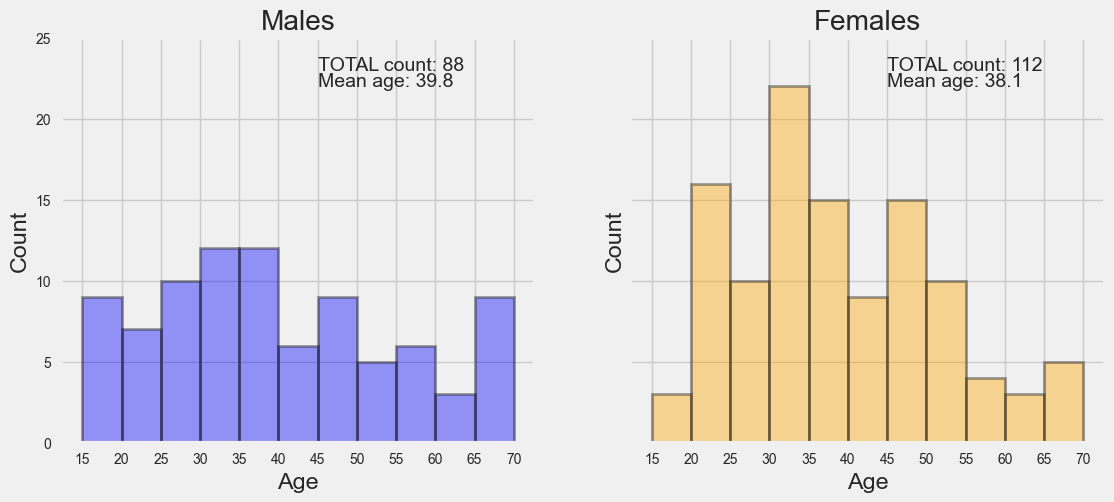

In [22]:
# Subset the data for males and females based on the 'Genre' column (0 for males, 1 for females)
males_age = data[data['Genre'] == 0]['Age']  # Subset with males' ages
females_age = data[data['Genre'] == 1]['Age']  # Subset with females' ages

# Define age bins for the histogram
age_bins = range(15, 75, 5)

# Create a figure with two subplots (one for males and one for females)
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot histogram for males' age distribution
sns.distplot(males_age, bins=age_bins, kde=False, color='blue', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)  # Set the x-axis ticks to the age bins
ax1.set_ylim(top=25)  # Limit the y-axis to a maximum count of 25
ax1.set_title('Males')  # Title for the male subplot
ax1.set_ylabel('Count')  # Label for the y-axis
# Display total count and mean age for males in the plot
ax1.text(45, 23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45, 22, "Mean age: {:.1f}".format(males_age.mean()))

# Plot histogram for females' age distribution
sns.distplot(females_age, bins=age_bins, kde=False, color='orange', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)  # Set the x-axis ticks to the age bins
ax2.set_ylim(top=25)  # Limit the y-axis to a maximum count of 25
ax2.set_title('Females')  # Title for the female subplot
ax2.set_ylabel('Count')  # Label for the y-axis
# Display total count and mean age for females in the plot
ax2.text(45, 23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45, 22, "Mean age: {:.1f}".format(females_age.mean()))

# Show the plot
plt.show()

## Age vs Annual Income by Genre

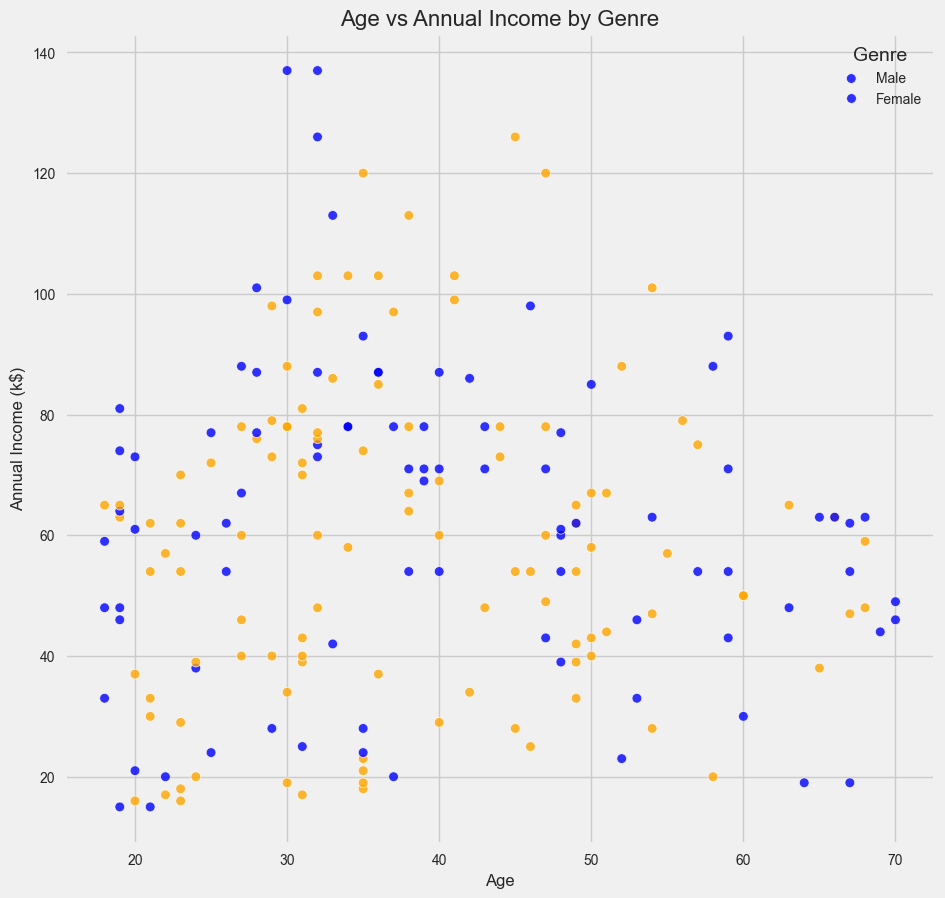

In [24]:
# Ensure 'Genre' is categorical
data['Genre'] = data['Genre'].astype('category')

# Scatter plot with corrected palette
plt.figure(figsize=(10, 10))

# Scatter plot with hue based on 'Genre' and corrected palette
sns.scatterplot(
    x='Age', 
    y='Annual Income (k$)', 
    data=data, 
    hue='Genre', 
    palette=['blue', 'orange'],  # Ensure palette has blue for male and orange for female
    alpha=0.8
)

# Set plot title and labels
plt.title('Age vs Annual Income by Genre', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)

# Customize the legend
plt.legend(title='Genre', labels=['Male', 'Female'])

# Display grid
plt.grid(True)

# Show the plot
plt.show()

This scatter plot depicts the relationship between customers' ages and their annual incomes (in $K), differentiated by gender. Orange points represent female customers, and blue points represent male customers. The data shows that individuals across both genders with ages ranging from their 20s to 50s tend to have a wide range of incomes, while older customers are less densely represented. There doesn't appear to be a strong correlation between age and annual income, but gender distribution is balanced across the dataset.

## Distribution of Spending Scores by Gender

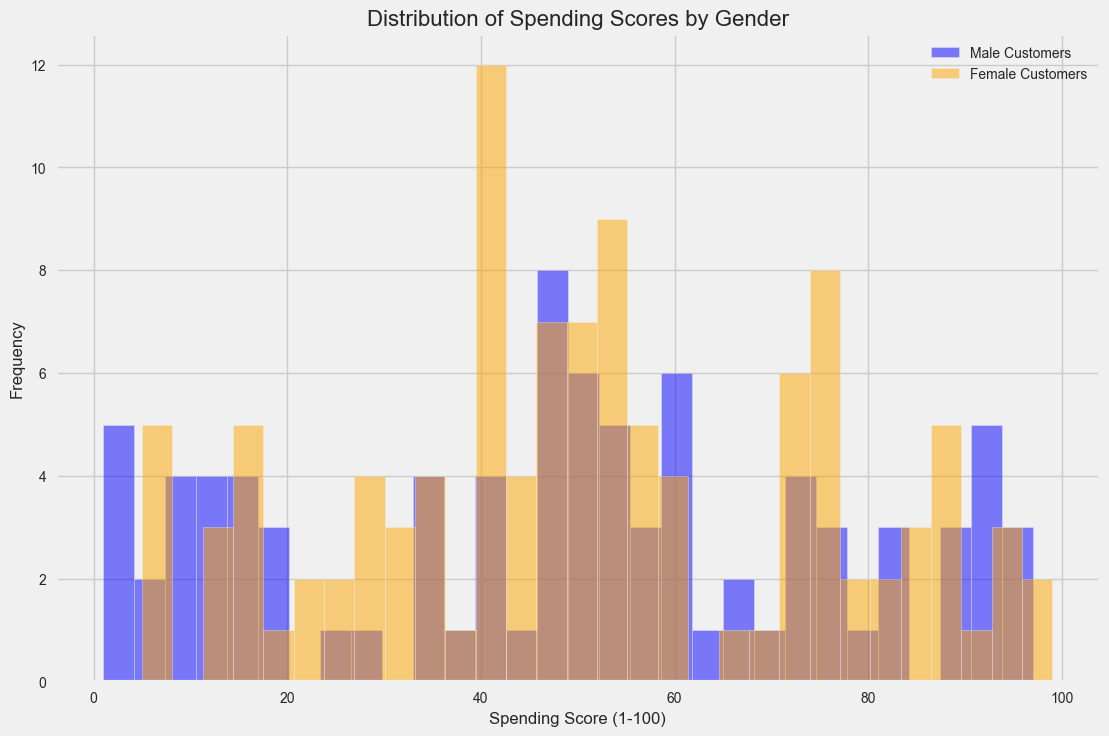

In [26]:
# Histograms to compare Spending Score distributions for male and female customers
plt.figure(figsize=(12, 8))
data.loc[data.Genre == 0, 'Spending Score (1-100)'].hist(
    label="Male Customers", bins=30, alpha=0.5, color='blue'
)
data.loc[data.Genre == 1, 'Spending Score (1-100)'].hist(
    label="Female Customers", bins=30, alpha=0.5, color='orange'
)
plt.title('Distribution of Spending Scores by Gender', fontsize=16)
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

This histogram compares the distribution of spending scores (ranging from 1 to 100) between male and female customers. The orange bars represent female customers, while the blue bars represent male customers. Female customers generally show more variability in spending scores, with peaks observed around scores of 20 and 60. Male customers, while less variable, also exhibit notable peaks at specific score ranges, such as near 40.

___


# IV: K-Means Cluster Creation

![K-Means Cluster Creation](Images/clustering-process.png)

In this step, we perform the following:
1. Select relevant features for clustering.
3. Use the **Elbow Method** to determine the optimal number of clusters.
4. Apply **K-Means Clustering** to segment customers.
5. Visualize the clusters.
6. Evaluate with Silhouette score.

## Step 1 : Select relevant features

In [25]:
# Clustering is based on 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

## Step 2 : Determine the optimal number of clusters using the Elbow Method

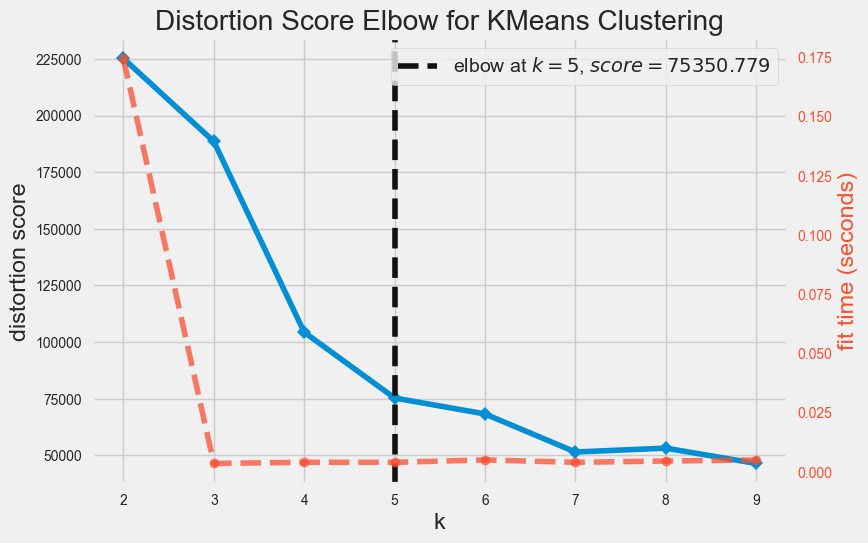

In [30]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

The Elbow Curve indicates that using 5 clusters is the most efficient choice for this dataset when applying the K-Means algorithm.

## Step 3 : Applying K-Means with 5 Clusters

In [32]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X) # initialise and fit K-Means model

In [34]:
# Create a copy of the dataset with cluster labels
KM5_clustered = X.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to point

## Step 4 : Visualizing Clusters

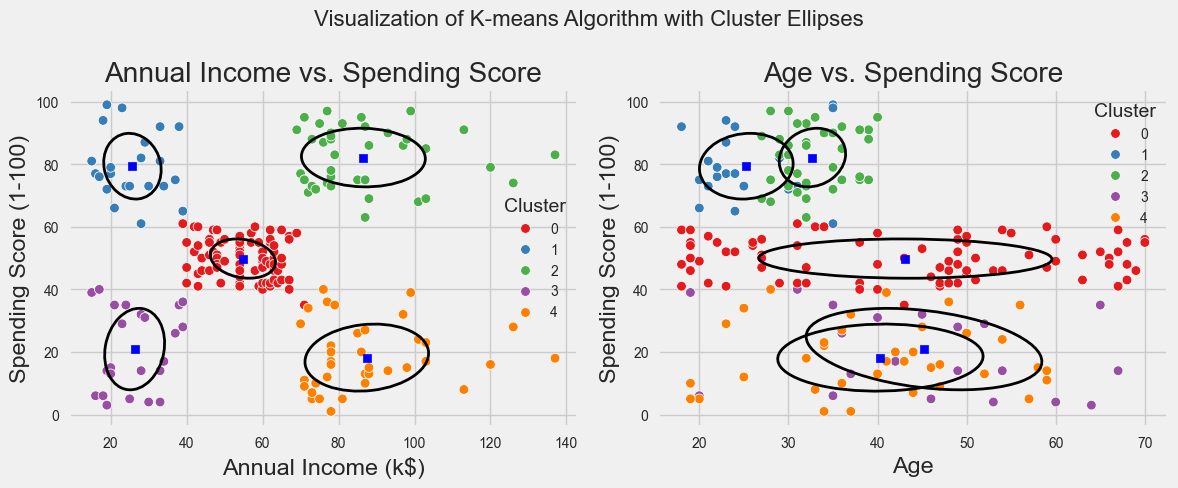

In [67]:
# Function to draw ellipses for clusters
def draw_ellipse(ax, cluster_data, edge_color):
    cov = np.cov(cluster_data.T)  # Calculate covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)  # Eigenvalues and eigenvectors
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    # Calculate width, height, and angle of ellipse
    width, height = 2 * np.sqrt(eigenvalues)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    center = cluster_data.mean(axis=0)

    # Draw ellipse
    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle,
                      edgecolor=edge_color, fc='none', lw=2)
    ax.add_patch(ellipse)

# Create scatter plots
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot: Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2],
                marker='s', s=40, c="blue")
axes[0].set_title("Annual Income vs. Spending Score")

# Add ellipses for each cluster
for cluster_id in KM5_clustered['Cluster'].unique():
    cluster_data = KM5_clustered[KM5_clustered['Cluster'] == cluster_id][['Annual Income (k$)', 'Spending Score (1-100)']].values
    draw_ellipse(axes[0], cluster_data, edge_color='black')

# Second scatter plot: Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2],
                marker='s', s=40, c="blue")
axes[1].set_title("Age vs. Spending Score")

# Add ellipses for each cluster
for cluster_id in KM5_clustered['Cluster'].unique():
    cluster_data = KM5_clustered[KM5_clustered['Cluster'] == cluster_id][['Age', 'Spending Score (1-100)']].values
    draw_ellipse(axes[1], cluster_data, edge_color='black')

# Add a suptitle for the entire figure
fig1.suptitle("Visualization of K-means Algorithm with Cluster Ellipses", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

## Step 5 : Silhouette Analysis to Evaluate Clustering Quality

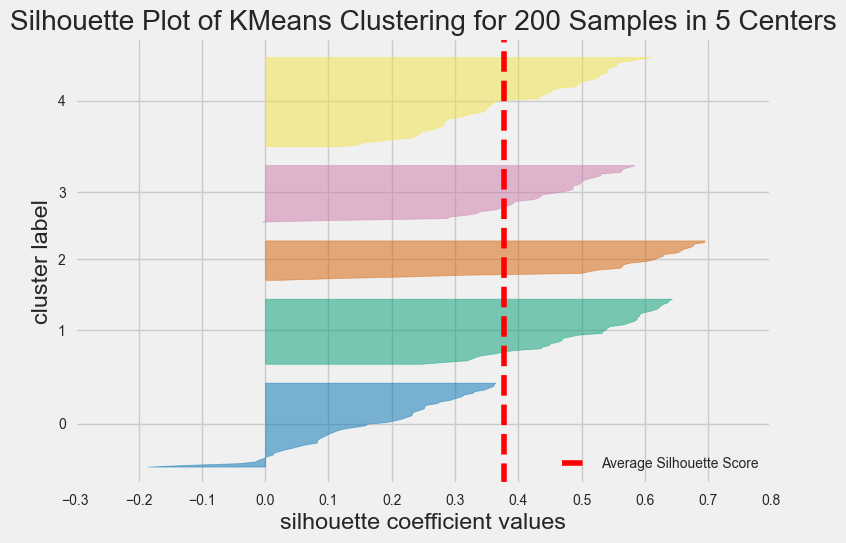

In [75]:
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='colorblind')
visualizer.fit(X)
visualizer.show()
plt.show()

### Metric 1: Silhouette Score

In [40]:
# This measures how similar each point is to its own cluster (cohesion) compared to other clusters (separation).
# Values range from -1 (poor clustering) to 1 (perfect clustering).
silhouette_kmeans = silhouette_score(X, KM_5_clusters.labels_)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
# A higher silhouette score indicates better-defined clusters.

Silhouette Score for K-Means: 0.44446409171786105


### Metric 2: Davies-Bouldin Index

In [42]:
# This evaluates the ratio of within-cluster scatter to between-cluster separation.
# Lower values indicate better clustering.
davies_bouldin_kmeans = davies_bouldin_score(X, KM_5_clusters.labels_)
print(f"Davies-Bouldin Index for K-Means: {davies_bouldin_kmeans}")
# A lower Davies-Bouldin Index indicates better clustering quality.

Davies-Bouldin Index for K-Means: 0.8192608000040172


___

# V: Applying DBSCAN Clustering

![DBSCAN Cluster Creation](Images/DBSCAN.png)

In this step, we perform the following:
1. Define Hyperparameters for DBSCAN.
2. Perform Clustering and Evaluate Silhouette Scores.
3. Visualize the Number of Clusters.
4. Visualize Silhouette Scores.
5. Perform DBSCAN Clustering with Optimal Parameters.
6. Visualize the Clusters and Outliers.
7. Evaluation of DBSCAN Algorithm.

In [19]:
from sklearn.cluster import DBSCAN

## Step 1 : Define Hyperparameters for DBSCAN

In [27]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

Define a grid of hyperparameter values (eps and min_samples) for DBSCAN. These combinations will be tested to find the optimal parameters.

## Step 2 : Perform Clustering and Evaluate Silhouette Scores

In [29]:
no_of_clusters = []  # To store the number of clusters for each parameter combination
sil_score = []       # To store silhouette scores for each parameter combination

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)  # Perform DBSCAN clustering
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))  # Count the number of clusters
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))  # Compute silhouette score

Iterate over all parameter combinations and evaluate the clustering result by calculating:
    - The number of clusters formed.
    - The silhouette score, which measures clustering quality.

## Step 3 : Visualize the Number of Clusters

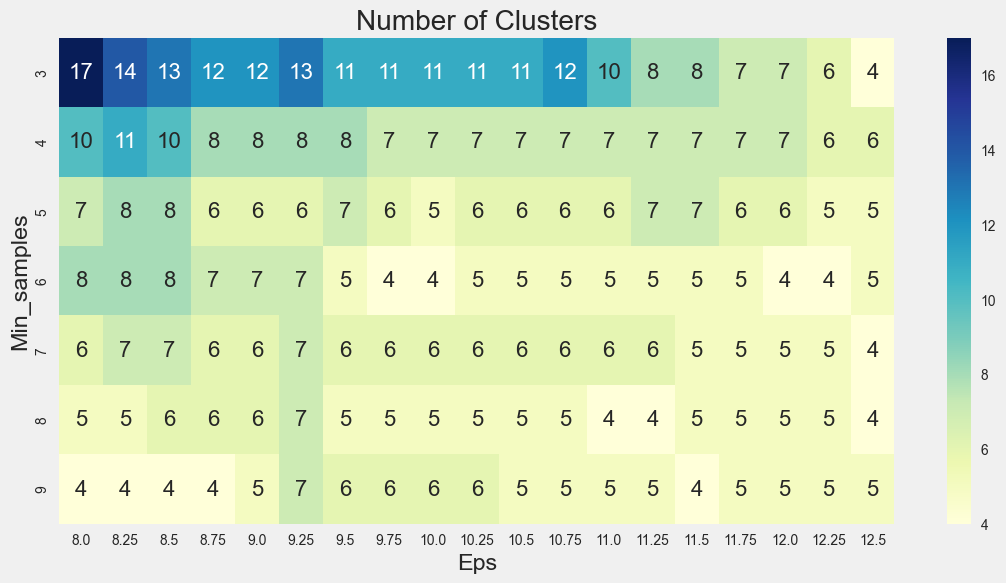

In [31]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])  # Convert parameters to DataFrame
tmp['No_of_clusters'] = no_of_clusters  # Add the number of clusters for each parameter combination

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')  # Create pivot table

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)  # Heatmap of the number of clusters
ax.set_title('Number of Clusters')
plt.show()

Generate a heatmap to visualize how the number of clusters changes for different eps and min_samples values.

## Step 4 : Visualize Silhouette Scores

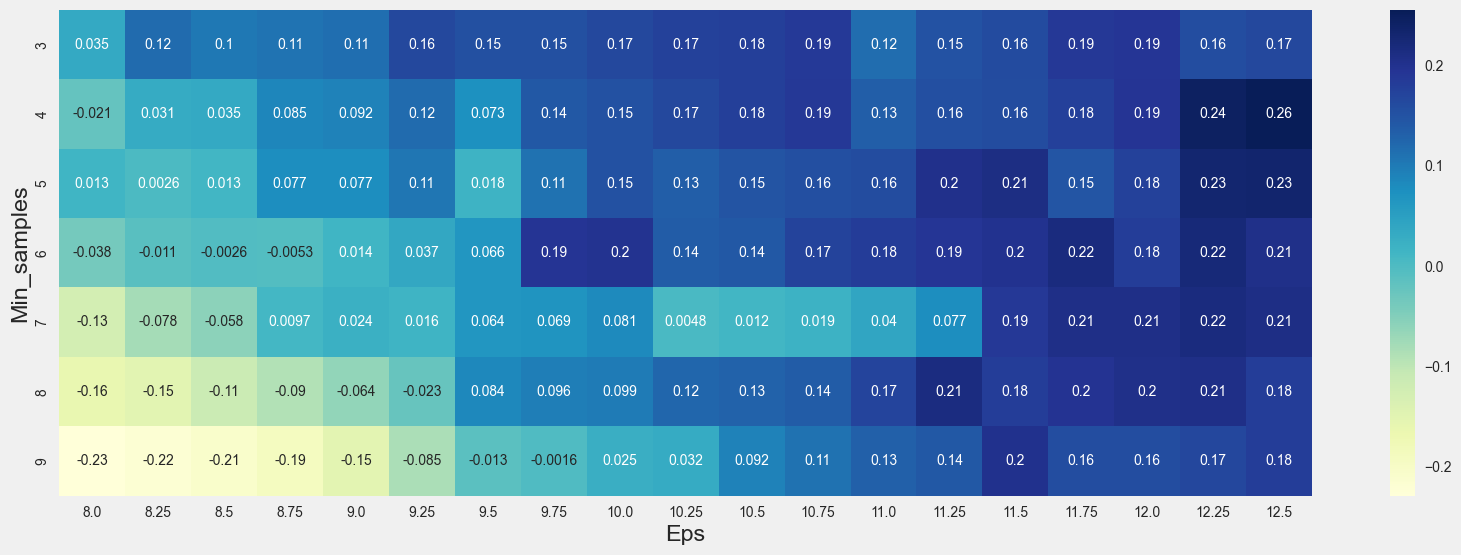

In [33]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])  # Reset DataFrame
tmp['Sil_score'] = sil_score  # Add silhouette scores for each parameter combination

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')  # Create pivot table

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)  # Heatmap of silhouette scores
plt.show()

Generate a heatmap to analyze the silhouette score (clustering quality) for different hyperparameter combinations.

## Step 5 : Perform DBSCAN Clustering with Optimal Parameters

In [43]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)  # Apply DBSCAN with selected parameters

DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = DBS_clustering.labels_  # Append cluster labels to the dataset
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]  # Identify outliers (label = -1)

Perform clustering with the chosen optimal parameters (eps=12.5 and min_samples=4) and identify outliers.

## Step 6 : Visualize the Clusters and Outliers

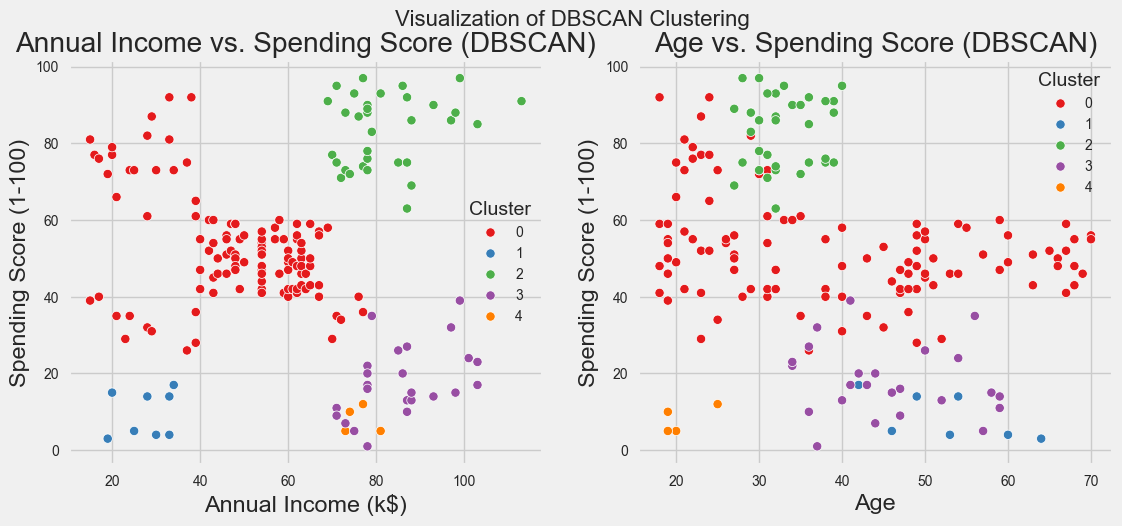

In [49]:
# Create two scatter plots: one for 'Annual Income' vs. 'Spending Score' and another for 'Age' vs. 'Spending Score'
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot for clusters (excluding outliers)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
axes[0].set_title("Annual Income vs. Spending Score (DBSCAN)")

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)
axes[1].set_title("Age vs. Spending Score (DBSCAN)")

# Add a suptitle for the entire figure
fig2.suptitle("Visualization of DBSCAN Clustering", fontsize=16)

# Show the plot
plt.show()

Create scatterplots to visualize:
    - Clusters formed on Annual Income (k$) vs. Spending Score (1-100).
    - Clusters formed on Age vs. Spending Score (1-100).

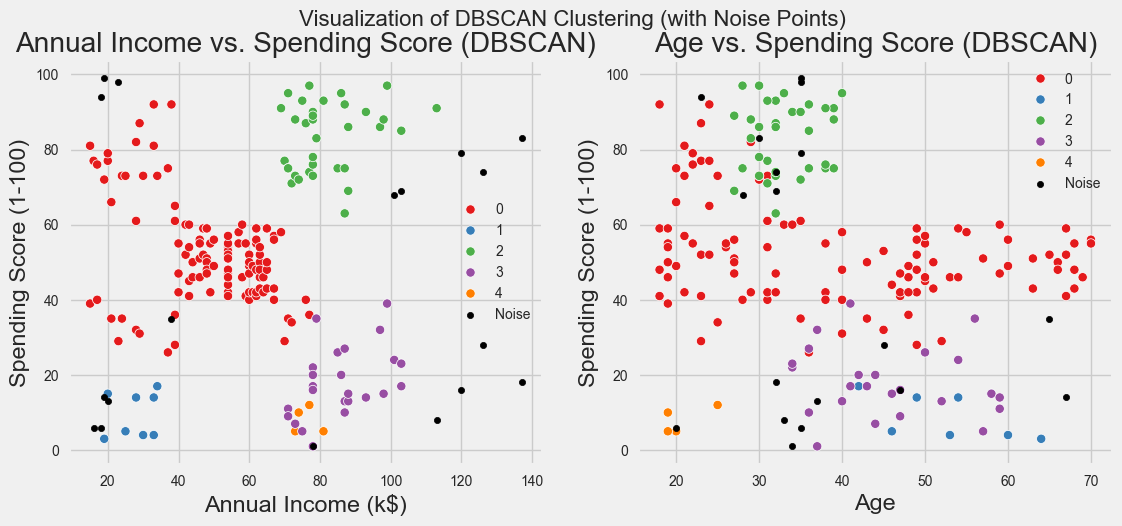

In [51]:
# Create two scatter plots: one for 'Annual Income' vs. 'Spending Score' and another for 'Age' vs. 'Spending Score'
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot for clusters (excluding outliers)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
# Scatterplot for noise points
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
                color='black', label='Noise', s=20)
axes[0].legend()
axes[0].set_title("Annual Income vs. Spending Score (DBSCAN)")

# Scatterplot for clusters (excluding outliers)
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)
# Scatterplot for noise points
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'],
                color='black', label='Noise', s=20)
axes[1].legend()
axes[1].set_title("Age vs. Spending Score (DBSCAN)")

# Add a suptitle for the entire figure
fig2.suptitle("Visualization of DBSCAN Clustering (with Noise Points)", fontsize=16)

# Show the plot
plt.show()

## Step 7 : Evaluation of DBSCAN Algorithm

In [53]:
# Filter out noise points (-1) before calculating the silhouette score
filtered_data = DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1].drop('Cluster', axis=1)
filtered_labels = DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1]['Cluster']

silhouette_avg = silhouette_score(filtered_data, filtered_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.334268815892404


In [55]:
num_noise_points = len(outliers)
print(f"Number of Noise Points: {num_noise_points}")

Number of Noise Points: 18


In [57]:
# Davies-Bouldin score requires non-outlier data
davies_bouldin = davies_bouldin_score(filtered_data, filtered_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 0.7554712211796317


In [59]:
cluster_counts = DBSCAN_clustered['Cluster'].value_counts()
print("Cluster Size Distribution:")
print(cluster_counts)

Cluster Size Distribution:
Cluster
 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
Name: count, dtype: int64


# V: k-means vs DBSCAN

![K-Means Cluster Creation](Images/KvsD.png)


In [71]:
# Section: K-Means vs DBSCAN - Conclusion and Comparison

from IPython.display import display, Markdown

# Metrics Table
metrics = {
    "Algorithm": ["K-Means", "DBSCAN"],
    "Silhouette Score": [0.4269, 0.3343],
    "Davies-Bouldin Index": [0.8688, 0.7555],
    "Number of Clusters": [5, 5],
}

import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Display the metrics as a table
display(Markdown("### Metrics Comparison"))
display(metrics_df)

# Markdown text for comparison
conclusion_text = """
### Why K-Means Worked Better
- **K-Means** is designed to work well on datasets where clusters are spherical, evenly distributed, and distinct. In this dataset:
  - The clusters in "Annual Income vs. Spending Score" and "Age vs. Spending Score" were naturally spherical.
  - There was minimal overlap between clusters, making the dataset well-suited for K-Means.

- **K-Means Strengths:**
  - Produces well-separated clusters with minimal overlap.
  - Performs consistently when the number of clusters is known and matches the natural grouping of data.

---

### Why DBSCAN Did Not Perform Well
- **DBSCAN** struggled due to:
  - The clusters in this dataset being spherical, not irregularly shaped, which does not leverage DBSCAN's strengths.
  - The parameter `eps` was difficult to tune to precisely capture all clusters without merging or fragmenting them.
  - While DBSCAN identified noise points (18 in total), these points were not significant in affecting clustering quality.

- **DBSCAN Strengths:**
  - Handles datasets with irregular shapes and varying densities.
  - Detects outliers and noise points effectively.

---

### Dataset Characteristics Favoring Each Algorithm
- **K-Means:** Best for:
  - Spherical, well-separated clusters.
  - Clean datasets without significant noise.
  - Moderate-to-large datasets where all points belong to clusters.

- **DBSCAN:** Best for:
  - Arbitrarily shaped clusters.
  - Datasets with significant noise or outliers.
  - Varying densities between clusters.

---

### Final Conclusion
- Based on this analysis, **K-Means** performed better on this dataset because of its spherical cluster shapes and clear separations.
- **DBSCAN** remains a powerful tool for datasets with irregular cluster shapes or significant noise, which were not characteristics of this dataset.
"""

# Display the conclusion text
display(Markdown(conclusion_text))

### Metrics Comparison

,Algorithm,Silhouette Score,Davies-Bouldin Index,Number of Clusters
0,K-Means,0.4269,0.8688,5
1,DBSCAN,0.3343,0.7555,5



### Why K-Means Worked Better
- **K-Means** is designed to work well on datasets where clusters are spherical, evenly distributed, and distinct. In this dataset:
  - The clusters in "Annual Income vs. Spending Score" and "Age vs. Spending Score" were naturally spherical.
  - There was minimal overlap between clusters, making the dataset well-suited for K-Means.

- **K-Means Strengths:**
  - Produces well-separated clusters with minimal overlap.
  - Performs consistently when the number of clusters is known and matches the natural grouping of data.

---

### Why DBSCAN Did Not Perform Well
- **DBSCAN** struggled due to:
  - The clusters in this dataset being spherical, not irregularly shaped, which does not leverage DBSCAN's strengths.
  - The parameter `eps` was difficult to tune to precisely capture all clusters without merging or fragmenting them.
  - While DBSCAN identified noise points (18 in total), these points were not significant in affecting clustering quality.

- **DBSCAN Strengths:**
  - Handles datasets with irregular shapes and varying densities.
  - Detects outliers and noise points effectively.

---

### Dataset Characteristics Favoring Each Algorithm
- **K-Means:** Best for:
  - Spherical, well-separated clusters.
  - Clean datasets without significant noise.
  - Moderate-to-large datasets where all points belong to clusters.

- **DBSCAN:** Best for:
  - Arbitrarily shaped clusters.
  - Datasets with significant noise or outliers.
  - Varying densities between clusters.

---

### Final Conclusion
- Based on this analysis, **K-Means** performed better on this dataset because of its spherical cluster shapes and clear separations.
- **DBSCAN** remains a powerful tool for datasets with irregular cluster shapes or significant noise, which were not characteristics of this dataset.


___

# Made with ❤️!